<a href="https://colab.research.google.com/github/lilacs2039/ColabNotebooks/blob/master/fastai/fastai%E8%AA%AC%E6%98%8E%E7%94%A8%E3%82%B3%E3%83%BC%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [0]:
# fastai公式のスクリプトを実行して、Colaboratoryにfastai環境を設定
# セットアップ・使い方　https://course.fast.ai/start_colab.html
# fast.ai forumのColabのページ。　https://forums.fast.ai/t/platform-colab/28161/11
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0      8      0  0:00:35  0:00:32  0:00:03    75
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
from torchsummary import summary

# サンプルコード

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


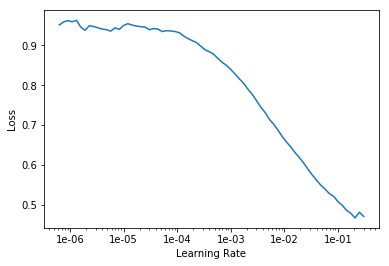

In [22]:
data = ImageDataBunch.from_folder(path)
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(1,max_lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.043553,0.014168,0.995584,00:08


In [24]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.017371,0.010728,0.996565,00:08
